In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import statistics as stats # https://docs.python.org/3/library/statistics.html#statistics.fmean
#import scipy.stats as spstats
import matplotlib.pyplot as plt


### Custom Modules ###
from functions.data_types import optimize_dtypes
from functions.dataframe_actions import df_info, df_clean
from functions.ml_training import train_classifiers, train_classifiers_tuned, plot_metrics

### Other configurations ###
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'
# #import warnings library
# import warnings
# # ignore all warnings
# warnings.filterwarnings('ignore')

In [7]:
# Read and optimize DataFrames
data_location = "../Data/"  # "/<path>"

all_features = pd.read_csv(data_location + "results_all_features.csv")
all_features['method'] = 'All Features'

selected_smote = pd.read_csv(data_location + "results_selected_smote.csv")
selected_smote['method'] = 'Selected SMOTE'

selected_borderline_smote = pd.read_csv(data_location + "results_selected_borderline_smote.csv")
selected_borderline_smote['method'] = 'Selected Borderline SMOTE'

selected_kmeans_smote = pd.read_csv(data_location + "results_selected_kmeans_smote.csv")
selected_kmeans_smote['method'] = 'Selected K-Means SMOTE'

selected_adasyn = pd.read_csv(data_location + "results_selected_adasyn.csv")
selected_adasyn['method'] = 'Selected ADASYN'

pca_smote = pd.read_csv(data_location + "results_pca_smote.csv")
pca_smote['method'] = 'PCA SMOTE'

pca_borderline_smote = pd.read_csv(data_location + "results_pca_borderline_smote.csv")
pca_borderline_smote['method'] = 'PCA Borderline SMOTE'

pca_kmeans_smote = pd.read_csv(data_location + "results_pca_kmeans_smote.csv")
pca_kmeans_smote['method'] = 'PCA K-Means SMOTE'

pca_adasyn = pd.read_csv(data_location + "results_pca_adasyn.csv")
pca_adasyn['method'] = 'PCA ADASYN'

# Combine all DataFrames
combined_df = pd.concat([
    all_features,
    selected_smote,
    selected_borderline_smote,
    selected_kmeans_smote,
    selected_adasyn,
    pca_smote,
    pca_borderline_smote,
    pca_kmeans_smote,
    pca_adasyn
])

combined_df = combined_df.round(3)

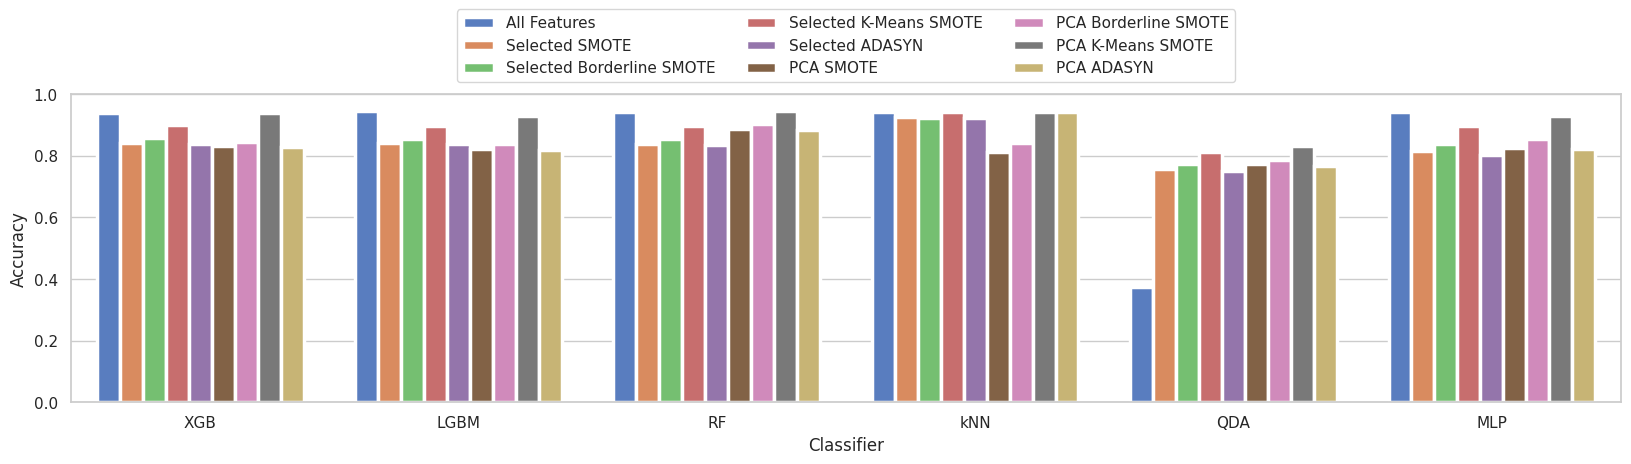

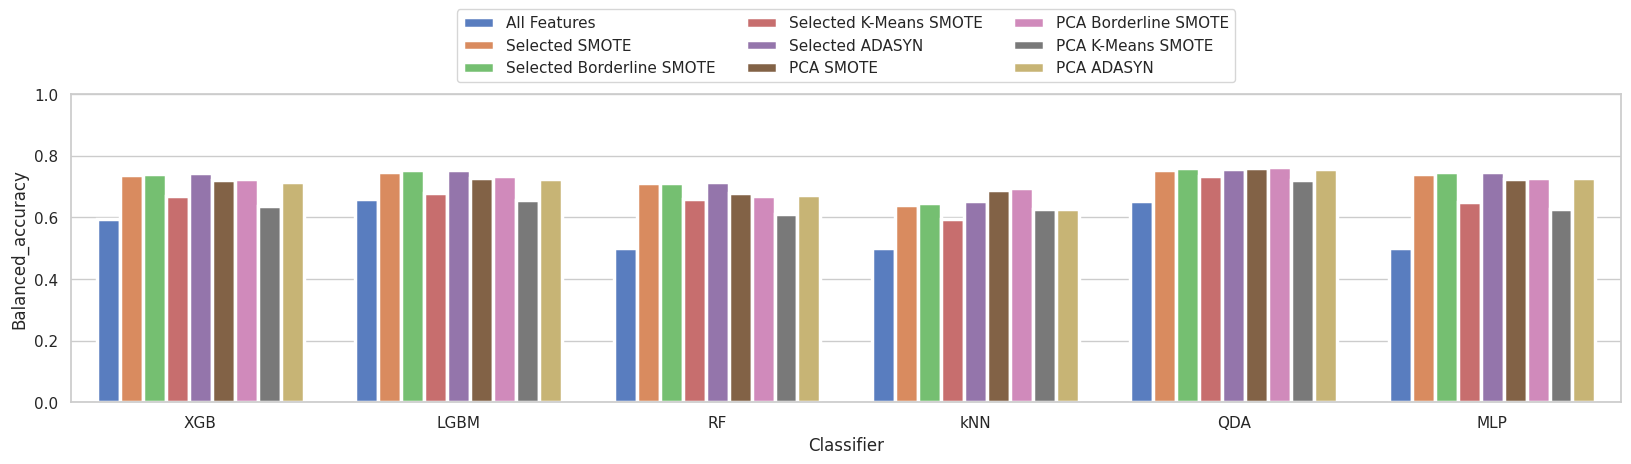

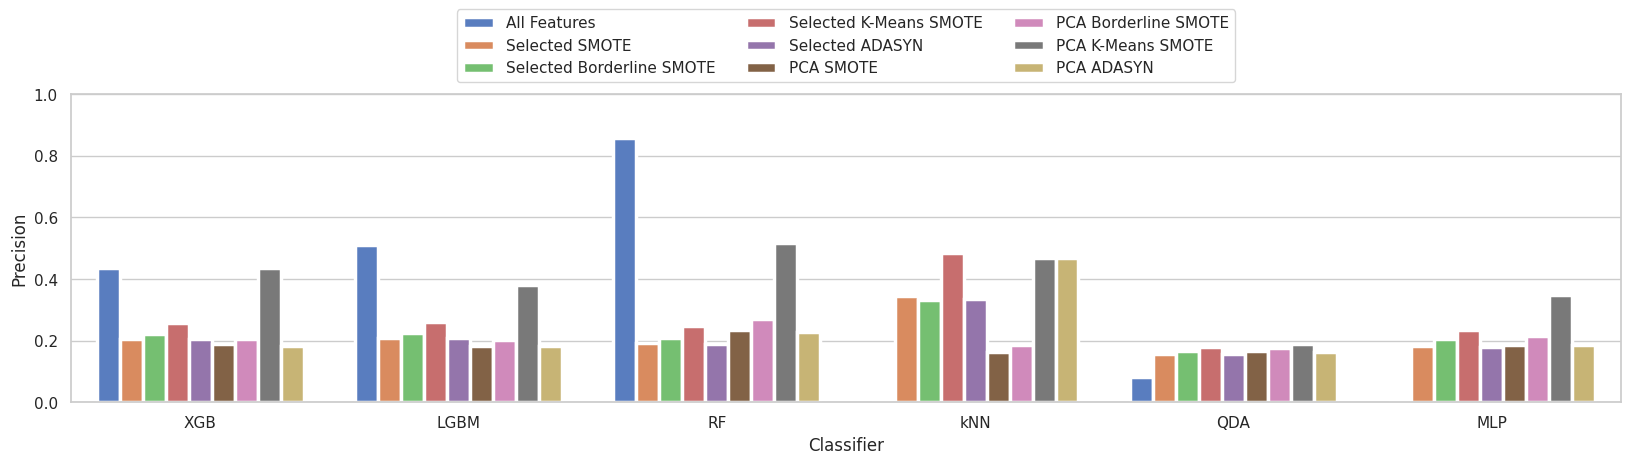

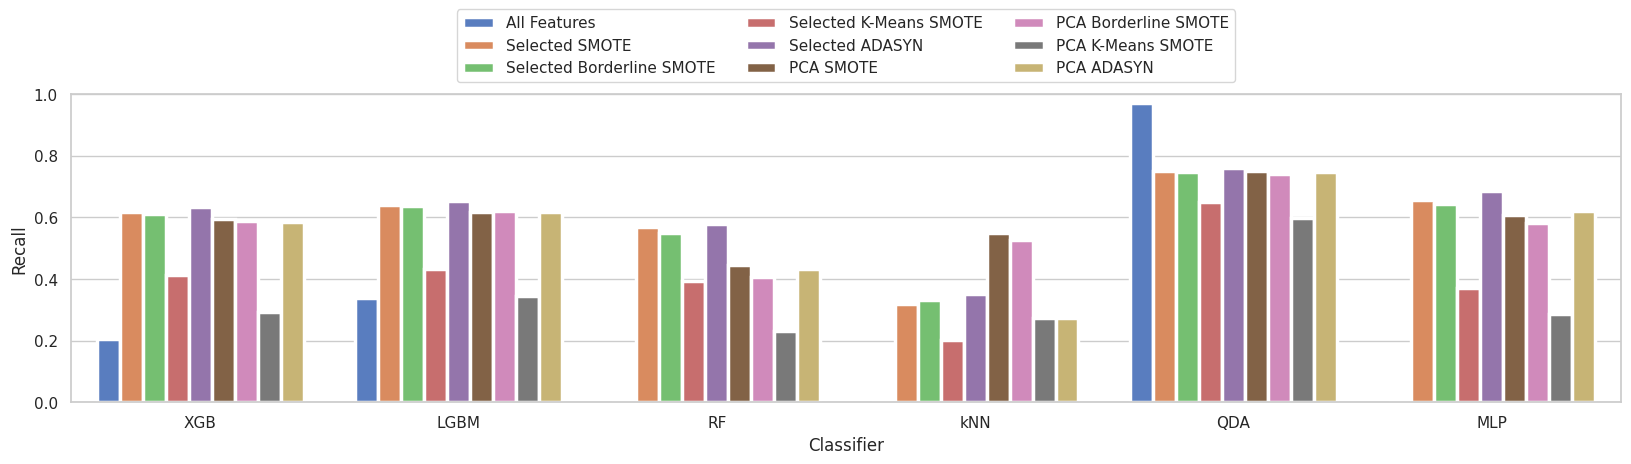

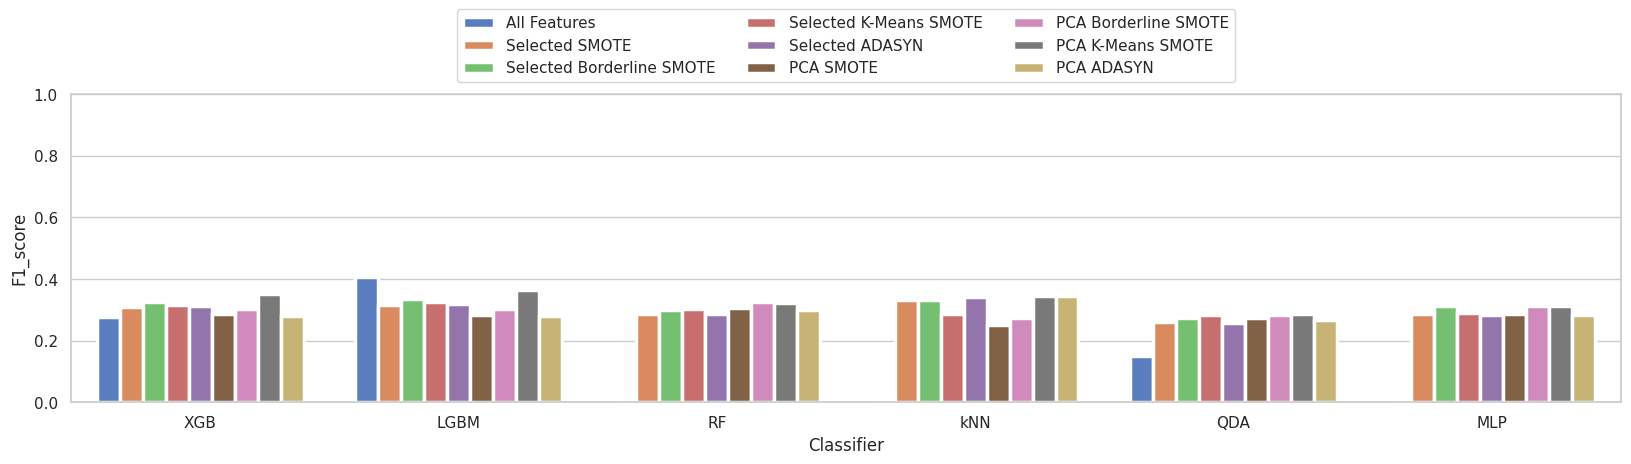

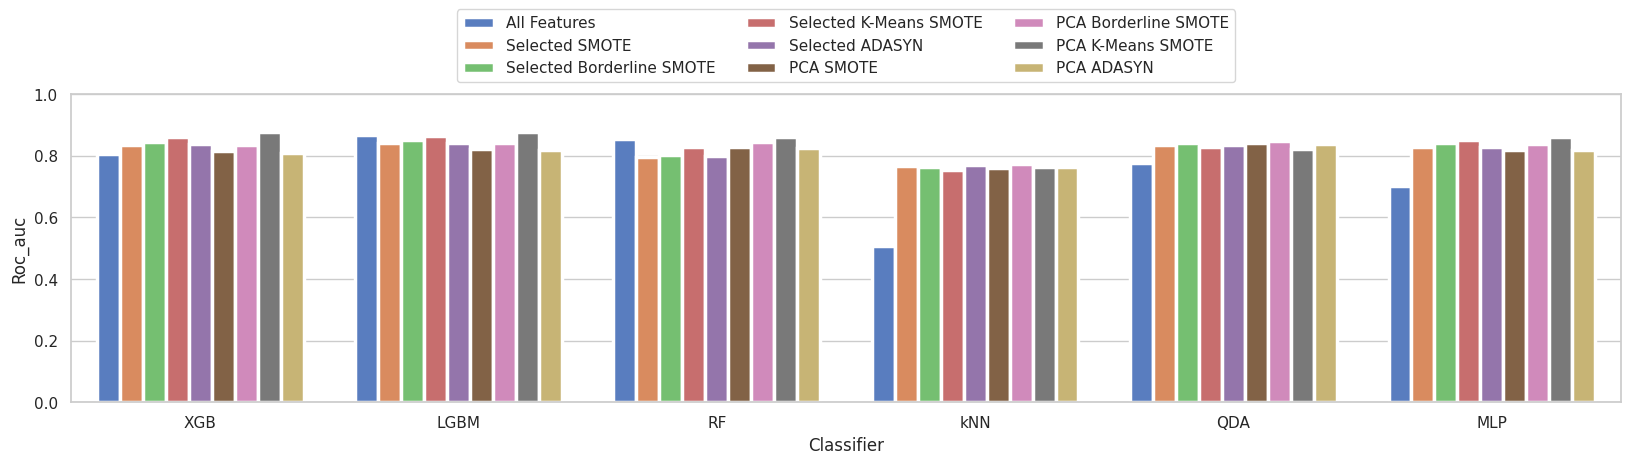

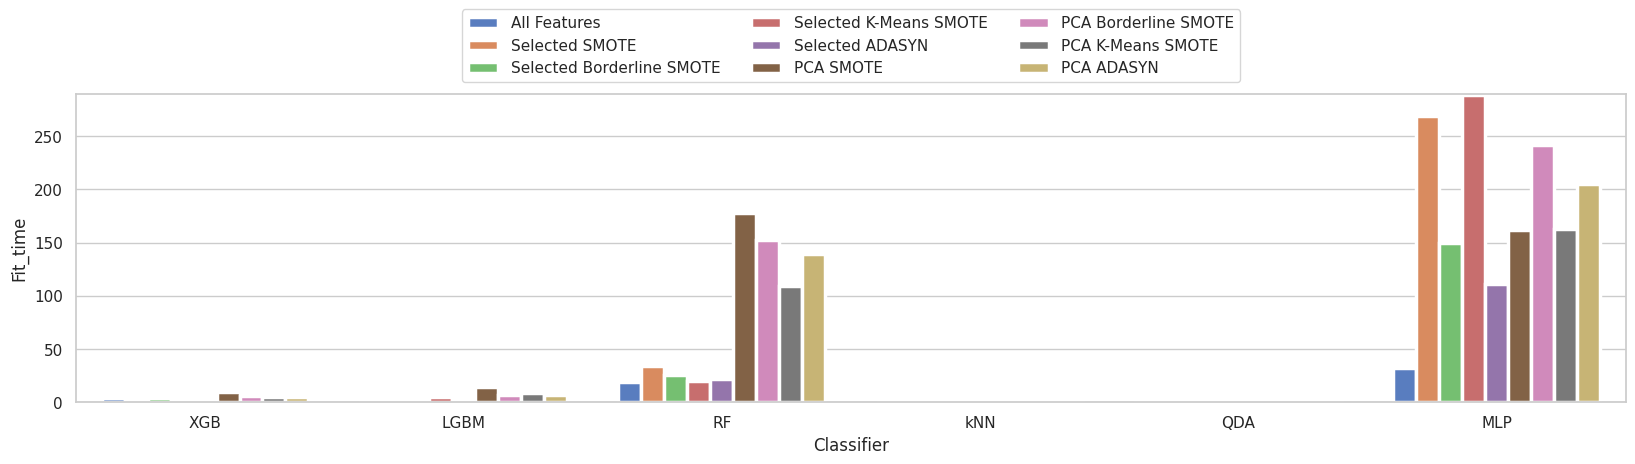

In [32]:
# Plotting function
def plot_metrics(df, metrics, hue='method'):
    sns.set(style="whitegrid", palette="muted", font_scale=1)

    for metric in metrics:
        plt.figure(figsize=(20, 4))
        plot = sns.barplot(data=df, x='classifier', y=metric, hue=hue, errorbar=None, capsize=0.1, err_kws={'linewidth': 1.5}, dodge=True, linewidth=2.5)
        plot.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3)
        plot.set_ylim(0, 1 if metric != 'fit_time' else df[metric].max() + 1)
        # for container in plot.containers:
        #     for bar in container:
        #         yval = bar.get_height()
        #         plot.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', rotation=45)
        plt.ylabel(metric.capitalize())
        plt.xlabel('Classifier')
        plt.xticks(rotation=0)
        plt.show()

# Define the metrics you want to plot
metrics = [
    "accuracy",
    "balanced_accuracy",
    "precision",
    "recall",
    "f1_score",
    "roc_auc",
    "fit_time"
]

# Plot the metrics using the combined DataFrame
plot_metrics(combined_df, metrics)
